## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables (`'RAD'` and `'TAX'`) and deleted the `'NOX'` (nitride oxide concentration) variable because it was highly correlated with two other features.

In [1]:
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD', 'TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop('NOX', axis=1)

## Look at the histograms for the continuous variables

In [2]:
boston_features.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,15.3,396.90,4.98,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,17.8,396.90,9.14,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,17.8,392.83,4.03,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,18.7,394.63,2.94,0,0,0,0,0,0,0
4,0.06905,0.0,2.18,0.0,7.147,54.2,6.0622,18.7,396.90,5.33,0,0,0,0,0,0,0


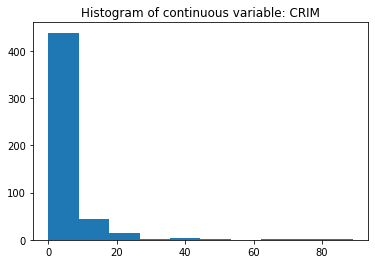

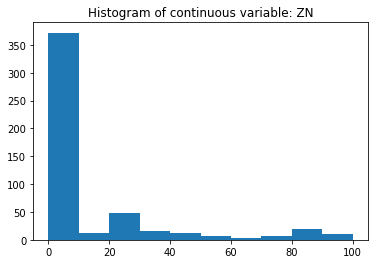

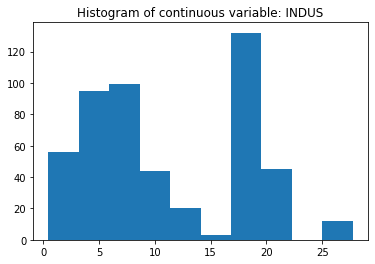

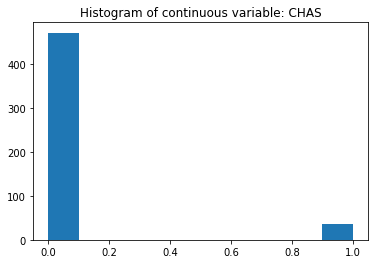

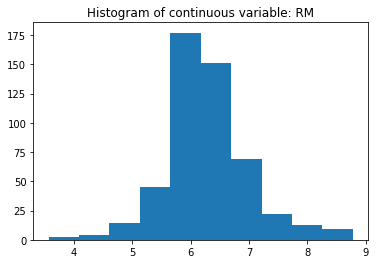

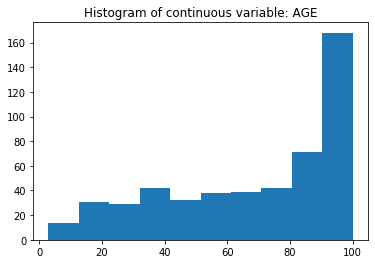

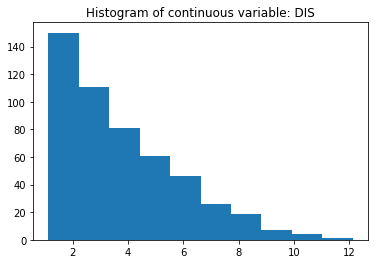

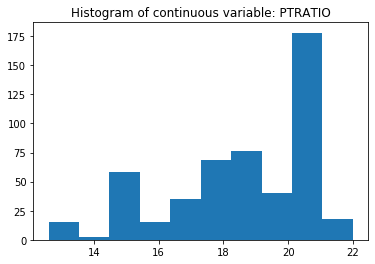

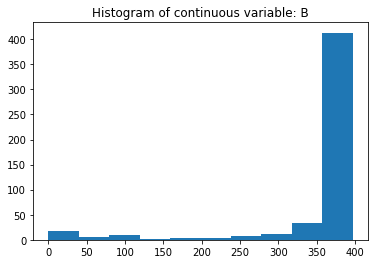

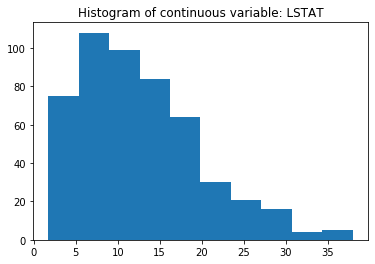

In [3]:
import matplotlib.pyplot as plt
for col in boston_features.columns[:10]:
    plt.hist(boston_features[col])
    plt.title(f'Histogram of continuous variable: {col}')
    plt.show()

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the `'ZN'` feature?  

In [4]:
import numpy as np
non_normal = ['CRIM', 'INDUS', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']
for feat in non_normal:
    boston_features[feat] = boston_features[feat].map(lambda x: np.log(x))

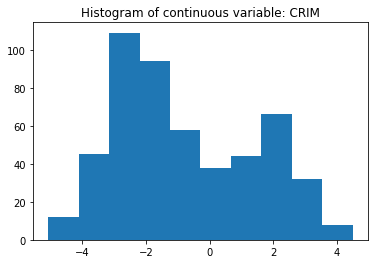

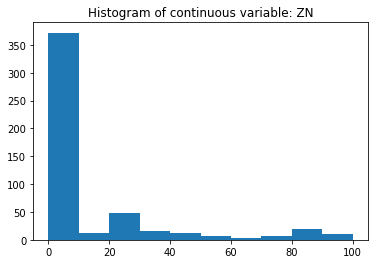

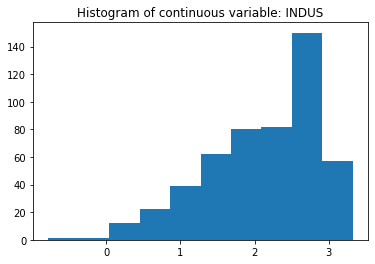

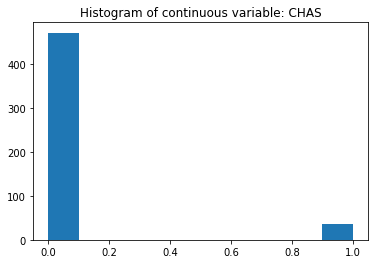

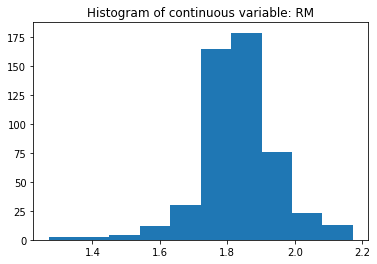

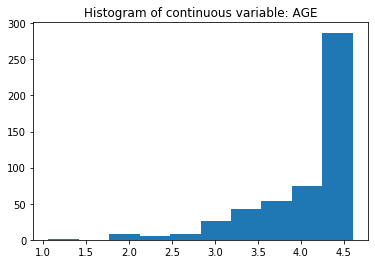

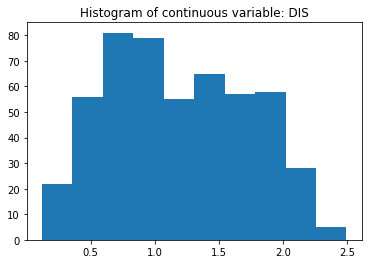

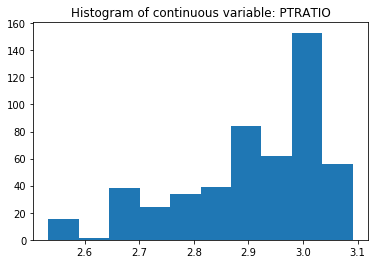

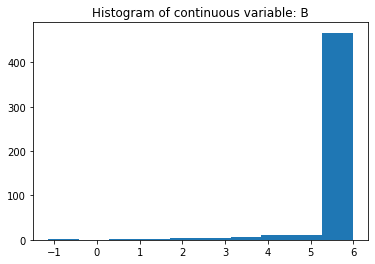

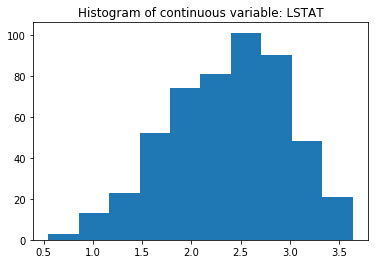

In [5]:
for col in boston_features.columns[:10]:
    plt.hist(boston_features[col])
    plt.title(f'Histogram of continuous variable: {col}')
    plt.show()

`'ZN'` has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [6]:
boston_features['ZN'] = boston_features['ZN'].loc[boston_features['ZN'] > 25] = 1
boston_features['ZN'] = boston_features['ZN'].loc[boston_features['ZN'] <= 25] = 0

/Users/kyleaguilar/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
boston_features['ZN'].astype('category')

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: ZN, Length: 506, dtype: category
Categories (1, int64): [0]

## Try different types of transformations on the continuous variables

Store your final features in a DataFrame `features_final`: 

In [8]:
boston_features.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,-5.064036,0,0.837248,0.0,1.883275,4.177459,1.408545,2.727853,5.983684,1.605430,0,0,0,1,0,0,0
1,-3.600502,0,1.955860,0.0,1.859574,4.368181,1.602836,2.879198,5.983684,2.212660,0,0,0,0,0,0,0
2,-3.601235,0,1.955860,0.0,1.971996,4.112512,1.602836,2.879198,5.973377,1.393766,0,0,0,0,0,0,0
3,-3.430523,0,0.779325,0.0,1.945624,3.824284,1.802073,2.928524,5.977949,1.078410,0,0,0,0,0,0,0
4,-2.672924,0,0.779325,0.0,1.966693,3.992681,1.802073,2.928524,5.983684,1.673351,0,0,0,0,0,0,0


In [9]:
CRIM = boston_features['CRIM']
RM = boston_features['RM']
INDUS = boston_features['INDUS']
AGE = boston_features['AGE']
DIS = boston_features['DIS']
PTRATIO = boston_features['PTRATIO']
B = boston_features['B']
LSTAT = boston_features['LSTAT']

min_max_CRIM = (CRIM - min(CRIM)) / (max(CRIM) - min(CRIM))
min_max_RM = (RM - min(RM)) / (max(RM) - min(RM))
min_max_B = (B - min(B)) / (max(B) - min(B))


standardization_INDUS = (INDUS - np.mean(INDUS)) / np.sqrt(np.var(INDUS))
standardization_AGE = (AGE - np.mean(AGE)) / np.sqrt(np.var(AGE))
standardization_LSTAT = (LSTAT - np.mean(LSTAT)) / np.sqrt(np.var(LSTAT))

mean_norm_DIS = (DIS - np.mean(DIS)) / (max(DIS) - min(DIS))
mean_norm_PTRATIO = (PTRATIO - np.mean(PTRATIO)) / (max(PTRATIO) - min(PTRATIO))

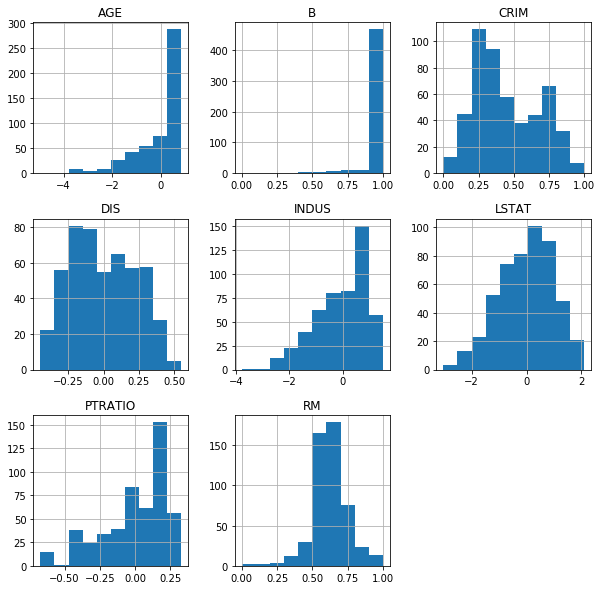

In [10]:
features_final = pd.DataFrame([])
features_final['CRIM'] = min_max_CRIM
features_final['RM'] = min_max_RM
features_final['INDUS'] = standardization_INDUS
features_final['AGE'] = standardization_AGE
features_final['DIS'] = mean_norm_DIS
features_final['PTRATIO'] = mean_norm_PTRATIO
features_final['B'] = min_max_B
features_final['LSTAT'] = standardization_LSTAT

features_final.hist(figsize = [10, 10]);

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!